# KNN Classification with NaN Handling

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [87]:
df_real = pd.read_csv('../data/data_real.csv')
df_fake = pd.read_csv('../data/data_fake.csv')

In [88]:
df_real.head()

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,False,1128,575,0.509300,322,False,False,False,False,...,1.527525,2.333333,1.131088,1.491866e+06,7517421.0,5.0,1.832700e+06,3.358789e+12,1.797422,True
1,True,True,430,353,0.819026,3,False,False,True,False,...,9.237604,85.333333,0.707107,5.472764e+06,6023604.0,4921924.0,7.790054e+05,6.068494e+11,0.000000,True
2,True,True,418,534,1.274463,139,False,False,False,False,...,7.131620,50.860000,0.321661,3.611337e+06,10774210.0,164203.0,3.163705e+06,1.000903e+13,1.065019,True
3,True,True,1425,3118,2.186536,206,False,False,True,False,...,11.146449,124.243333,0.682247,1.338888e+06,4057835.0,233556.0,1.025556e+06,1.051766e+12,0.939111,True
4,True,True,953,288,0.301887,458,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [89]:
df_fake.head()

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,True,2321,747,0.321705,10,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,True,True,4247,611,0.143832,99,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,True,True,781,338,0.432225,128,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,True,True,1764,1613,0.913881,64,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,True,False,68,65,0.942029,1,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [90]:
# df_real.fillna(df_real.mean(),inplace=True)
# df_fake.fillna(df_fake.mean(),inplace=True)
df_fake.head()

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,True,2321,747,0.321705,10,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,True,True,4247,611,0.143832,99,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,True,True,781,338,0.432225,128,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,True,True,1764,1613,0.913881,64,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,True,False,68,65,0.942029,1,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [91]:
df=pd.concat([df_real,df_fake],ignore_index=True)
df.dropna(inplace=True)

In [92]:
print(df)

       profile_pic  biography  follows_count  followed_by_count     ff_ratio  \
0             True      False           1128                575     0.509300   
1             True       True            430                353     0.819026   
2             True       True            418                534     1.274463   
3             True       True           1425               3118     2.186536   
7             True       True           1105            1510557  1365.783906   
...            ...        ...            ...                ...          ...   
17482         True       True           2323                 72     0.030981   
17483         True       True           2311               2934     1.269031   
17484         True       True           7498               2340     0.312042   
17485         True      False           6321                327     0.051724   
17486         True       True           6531                 61     0.009339   

       media_count  is_private  is_veri

In [93]:
features_columns=list(df.columns[:30])
# targets_column=list(df.columns[30:31])
# df.head()
print(features_columns)

['profile_pic', 'biography', 'follows_count', 'followed_by_count', 'ff_ratio', 'media_count', 'is_private', 'is_verified', 'is_business_account', 'is_joined_recently', 'highlight_reel_count', 'connected_fb_page', 'average_likes', 'max_likes', 'min_likes', 'std_likes', 'var_likes', 'skw_likes', 'average_comments', 'max_comments', 'min_comments', 'std_comments', 'var_comments', 'skw_comments', 'mean_time_between_posts', 'max_time_between_posts', 'min_time_between_posts', 'std_time_between_posts', 'var_time_between_posts', 'skw_time_between_posts']


In [94]:
df.shape

(10103, 31)

In [95]:
targets = df['real_account'].values
# df=df.loc[:,'profile_pic':'highlight_reel_count']

In [96]:
targets

array([ True,  True,  True, ..., False, False, False])

In [97]:
# df.drop('real_account', axis=1, inplace=True)

In [98]:
df.head()

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,False,1128,575,0.509300,322,False,False,False,False,...,1.527525,2.333333,1.131088,1.491866e+06,7517421.0,5.0,1.832700e+06,3.358789e+12,1.797422,True
1,True,True,430,353,0.819026,3,False,False,True,False,...,9.237604,85.333333,0.707107,5.472764e+06,6023604.0,4921924.0,7.790054e+05,6.068494e+11,0.000000,True
2,True,True,418,534,1.274463,139,False,False,False,False,...,7.131620,50.860000,0.321661,3.611337e+06,10774210.0,164203.0,3.163705e+06,1.000903e+13,1.065019,True
3,True,True,1425,3118,2.186536,206,False,False,True,False,...,11.146449,124.243333,0.682247,1.338888e+06,4057835.0,233556.0,1.025556e+06,1.051766e+12,0.939111,True
7,True,True,1105,1510557,1365.783906,20842,False,True,True,False,...,183.067356,33513.656667,1.685685,2.087617e+04,67514.0,170.0,1.710145e+04,2.924595e+08,0.982085,True


In [99]:
df_sc = StandardScaler().fit_transform(df)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(df_sc, targets, test_size = 0.2, random_state = 12345)

In [101]:
knn = KNeighborsClassifier()

In [102]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:
knn_pred = knn.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

In [105]:
print(confusion_matrix(y_test, knn_pred))

[[ 964    6]
 [   5 1046]]


In [106]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       970
        True       0.99      1.00      0.99      1051

    accuracy                           0.99      2021
   macro avg       0.99      0.99      0.99      2021
weighted avg       0.99      0.99      0.99      2021



In [107]:
err = []

for i in range(1, 30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasso di errore')

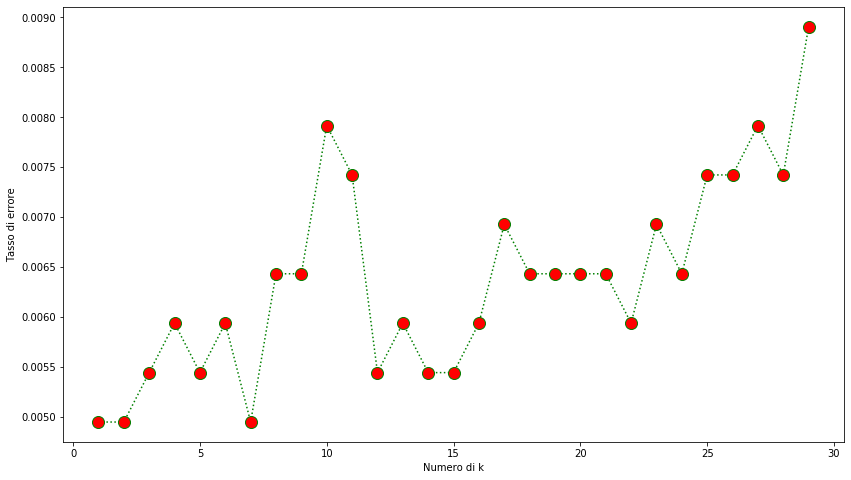

In [108]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 30), err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

In [109]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[ 963    7]
 [   8 1043]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       970
        True       0.99      0.99      0.99      1051

    accuracy                           0.99      2021
   macro avg       0.99      0.99      0.99      2021
weighted avg       0.99      0.99      0.99      2021

